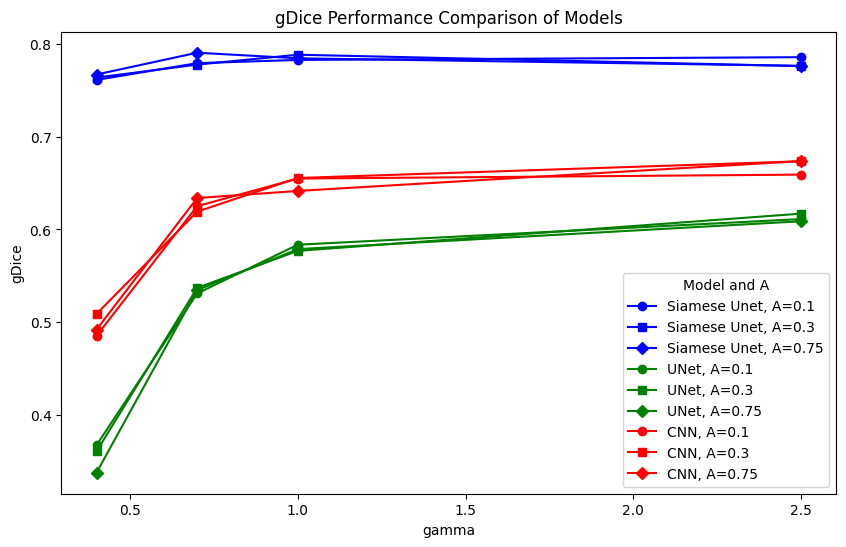

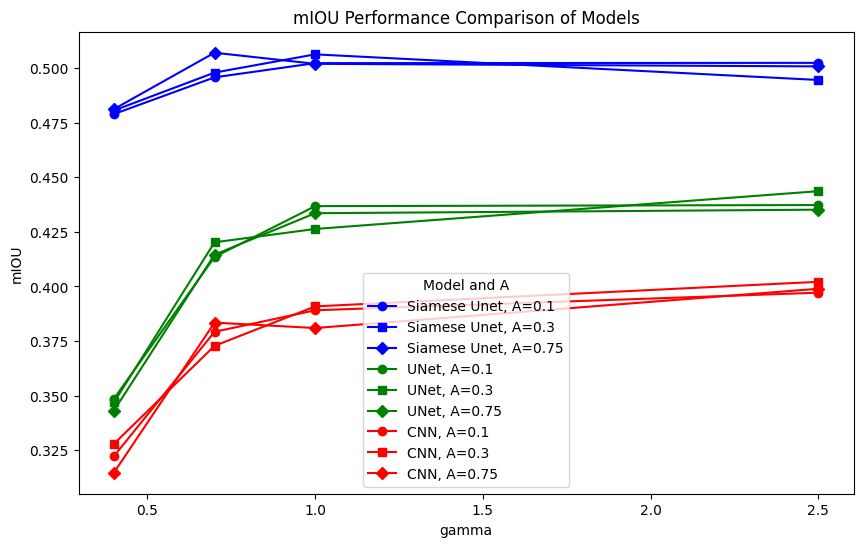

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("../artifacts/experiment_jasper_ridge.csv")

# Define the models
models = {'ca_siamese': 'Siamese Unet', 'unet': 'UNet', 'cnn': 'CNN'}

# Replace model names with the user-friendly names
data['model'] = data['model'].replace(models)

# Convert string representations of lists to actual lists and then calculate the mean
data['mIOU'] = data['mIOU'].apply(lambda x: np.mean([float(i) for i in x.strip('[]').split()]))

# Define the markers for different values of A
markers = {0.1: 'o', 0.3: 's', 0.75: 'D'}

# Define colors for different models
colors = {'Siamese Unet': 'blue', 'UNet': 'green', 'CNN': 'red'}

# Plot performance comparison of the models for gDice with different values of A
fig, ax = plt.subplots(figsize=(10, 6))
for model in data['model'].unique():
    for A in data['A'].unique():
        subset = data[(data['model'] == model) & (data['A'] == A)]
        ax.plot(subset['gamma'], subset['gDice'], label=f"{model}, A={A}", 
                color=colors[model], marker=markers[A], linestyle='-')

ax.set_title('gDice Performance Comparison of Models')
ax.set_xlabel('gamma')
ax.set_ylabel('gDice')
ax.legend(title='Model and A')

plt.show()

# Plot performance comparison of the models for mIOU with different values of A
fig, ax = plt.subplots(figsize=(10, 6))
for model in data['model'].unique():
    for A in data['A'].unique():
        subset = data[(data['model'] == model) & (data['A'] == A)]
        ax.plot(subset['gamma'], subset['mIOU'], label=f"{model}, A={A}", 
                color=colors[model], marker=markers[A], linestyle='-')

ax.set_title('mIOU Performance Comparison of Models')
ax.set_xlabel('gamma')
ax.set_ylabel('mIOU')
ax.legend(title='Model and A')

plt.show()

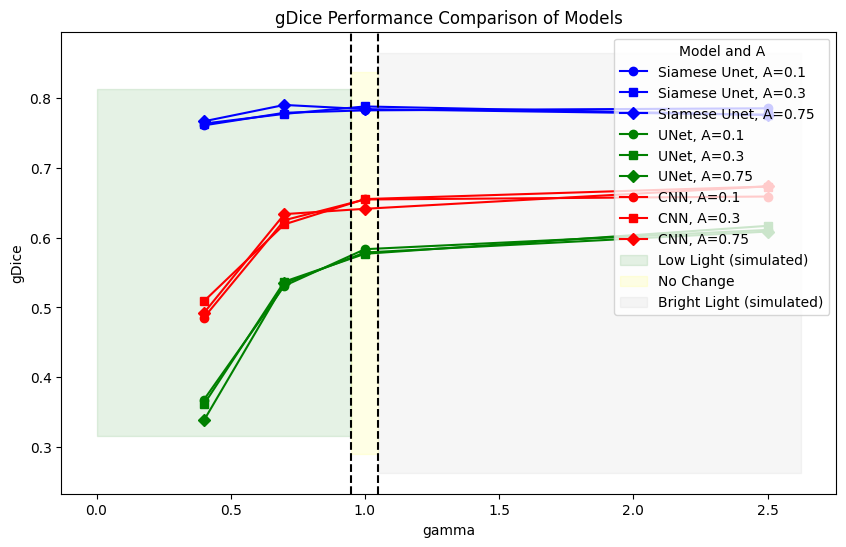

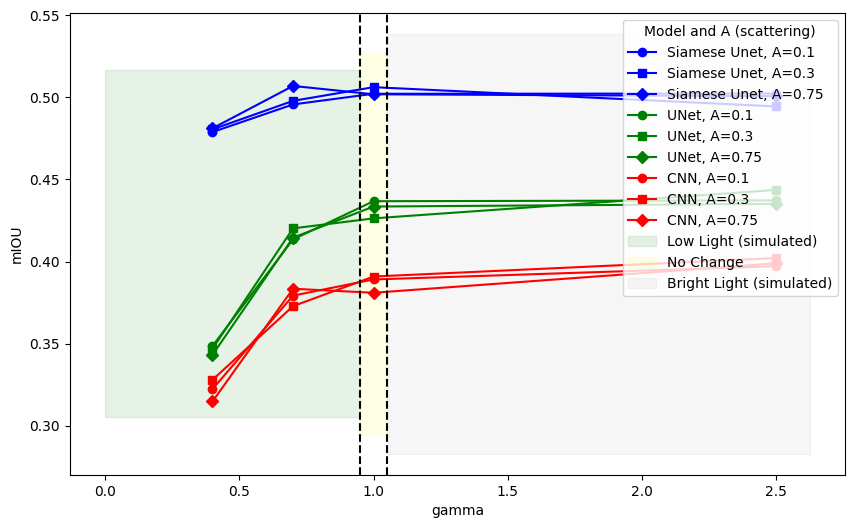

In [4]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Function to add images below the x-axis
def add_images(ax, images, positions):
    for image_path, pos in zip(images, positions):
        img = plt.imread(image_path)
        axins = ax.inset_axes(
        (pos, -0.3, 0.2, 0.2),
        xlim=(0, 100), ylim=(0, 100), xticklabels=[], yticklabels=[])
        axins.set_axis_off()
        axins.imshow(img, origin='lower')

# Create the plot for gDice
fig, ax = plt.subplots(figsize=(10, 6))
for model in data['model'].unique():
    for A in data['A'].unique():
        subset = data[(data['model'] == model) & (data['A'] == A)]
        ax.plot(subset['gamma'], subset['gDice'], label=f"{model}, A={A}", 
                color=colors[model], marker=markers[A], linestyle='-')

ax.axvline(x=0.95, color='black', linestyle='--')
ax.axvline(x=1.05, color='black', linestyle='--')
ax.fill_betweenx(ax.get_ylim(), 0, 0.95, color='green', alpha=0.1, label='Low Light (simulated)')
ax.fill_betweenx(ax.get_ylim(), 0.95, 1.05, color='yellow', alpha=0.1, label='No Change')
ax.fill_betweenx(ax.get_ylim(), 1.05, ax.get_xlim()[1], color='darkgray', alpha=0.1, label='Bright Light (simulated)')

# # Add vertical lines and shaded regions
# ax.axvline(x=0.99, color='black', linestyle='--')
# ax.axvline(x=1.1, color='black', linestyle='--')
# ax.fill_betweenx(ax.get_ylim(), 0, 0.99, color='gray', alpha=0.1, label='Bright Light')
# ax.fill_betweenx(ax.get_ylim(), 0.99, 1.1, color='yellow', alpha=0.1, label='No Change')
# ax.fill_betweenx(ax.get_ylim(), 1.1, ax.get_xlim()[1], color='darkgray', alpha=0.1, label='Low Light')

# Add images below the x-axis
# base_path = "../images/gamma"
# images = [f'{base_path}/0.4.png', f'{base_path}/1.0.png', f'{base_path}/2.5.png']  # Replace with actual paths
# positions = [0.0, 0.3, 0.8]  # X positions for the images
# add_images(ax, images, positions, y_offset=-0.05)

ax.set_title('gDice Performance Comparison of Models')
ax.set_xlabel('gamma')
ax.set_ylabel('gDice')
ax.legend(title='Model and A', loc='upper right')

# # Save the plot as a PDF
plt.savefig('gdice_performance.pdf')
# plt.show()
# Plot for mIOU
fig, ax = plt.subplots(figsize=(10, 6))
for model in data['model'].unique():
    for A in data['A'].unique():
        subset = data[(data['model'] == model) & (data['A'] == A)]
        ax.plot(subset['gamma'], subset['mIOU'], label=f"{model}, A={A}", 
                color=colors[model], marker=markers[A], linestyle='-')

# Add vertical lines and shaded regions
ax.axvline(x=0.95, color='black', linestyle='--')
ax.axvline(x=1.05, color='black', linestyle='--')
ax.fill_betweenx(ax.get_ylim(), 0, 0.95, color='green', alpha=0.1, label='Low Light (simulated)')
ax.fill_betweenx(ax.get_ylim(), 0.95, 1.05, color='yellow', alpha=0.1, label='No Change')
ax.fill_betweenx(ax.get_ylim(), 1.05, ax.get_xlim()[1], color='darkgray', alpha=0.1, label='Bright Light (simulated)')

# # Add images below the x-axis
# add_images(ax, images, positions)

# ax.set_title('mIOU Performance Comparison of Models')
ax.set_xlabel('gamma')
ax.set_ylabel('mIOU')
ax.legend(title='Model and A (scattering)', loc='upper right')

# Save the plot as a PDF
plt.savefig('miou_performance.pdf', bbox_inches='tight', pad_inches=0.2)
plt.show()